In [1]:
import csv
import pandas as pd
import numpy as np
%config Completer.use_jedi = False

## label classification on IRIS dataset


In [2]:
df = pd.read_csv(r'iris.csv', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data = df.values
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

In [4]:
N = len(data)
K = N//5  # test size
N, K

(150, 30)

In [5]:
K_index = np.random.randint(0, N, K)
X_test = data[K_index, :-1]
Y_test = data[K_index, -1]
X_test, Y_test #test set

(array([[4.6, 3.6, 1.0, 0.2],
        [6.3, 2.8, 5.1, 1.5],
        [6.6, 2.9, 4.6, 1.3],
        [6.8, 2.8, 4.8, 1.4],
        [5.9, 3.0, 5.1, 1.8],
        [4.8, 3.4, 1.6, 0.2],
        [5.8, 2.6, 4.0, 1.2],
        [6.0, 2.9, 4.5, 1.5],
        [4.8, 3.0, 1.4, 0.1],
        [4.8, 3.0, 1.4, 0.3],
        [6.0, 3.0, 4.8, 1.8],
        [4.6, 3.1, 1.5, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [6.8, 2.8, 4.8, 1.4],
        [6.2, 2.9, 4.3, 1.3],
        [6.1, 2.9, 4.7, 1.4],
        [5.7, 2.8, 4.5, 1.3],
        [6.0, 2.9, 4.5, 1.5],
        [7.2, 3.0, 5.8, 1.6],
        [6.4, 2.7, 5.3, 1.9],
        [6.1, 2.8, 4.0, 1.3],
        [6.7, 3.1, 4.4, 1.4],
        [5.4, 3.0, 4.5, 1.5],
        [6.4, 3.1, 5.5, 1.8],
        [6.4, 3.2, 5.3, 2.3],
        [5.8, 2.7, 5.1, 1.9],
        [6.7, 3.0, 5.0, 1.7],
        [6.4, 3.1, 5.5, 1.8],
        [6.6, 2.9, 4.6, 1.3],
        [6.7, 3.3, 5.7, 2.1]], dtype=object),
 array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
        'Iris-versicolor

In [6]:
mask = np.ones(N, bool)
mask[K_index] = False
X_train = data[mask][:, :-1]
Y_train = data[mask][:, -1]
X_train, Y_train #training set

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3.0, 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [5.0, 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5.0, 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.3, 3.0, 1.1, 0.1],
        [5.8, 4.0, 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5.0, 3.0, 1.6, 0.2],
        [5.0, 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5.5, 4.2, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.0, 3.2, 1.2, 0.2],
        [5.5, 3.5, 1.3, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [4

In [7]:
class KNearestNeighbors:
    import numpy as np
    from collections import Counter as cnt

    def __init__(self, k, distance_metric="euclidean", weights="uniform"):
        """initialize the knn algorithm
        :param k: size of neighbors, integer
        :param distance_metric: type of distance measure
            possible options ('euclidean' - default,'cosine','manhattan')
        :param weights: voting preference, either uniform or weighted
        """
        self.k = k
        self.distance_metric = distance_metric
        self.weights = weights

    def fit(self, X, y):
        """
        Store the 'prior knowledge' of you model that will be used
        to predict new labels.
        :param X : input data points, ndarray, shape = (R,C).
        :param y : input labels, ndarray, shape = (R,).
        """
        self.tr_data = X
        self.tr_labels = y

    def predict(self, X):
        """Run the KNN classification on X.
        :param X: input data points, ndarray, shape = (N,C).
        :return: labels : ndarray, shape = (N,).
        """
        N = 1 if X.ndim == 1 else len(X)
        p_labels = []
        distance_options = {
            'euclidean': self.euclidean_distance,
            'cosine': self.cosine_distance,
            'manhattan': self.manhattan_distance
        }

        distance = distance_options[self.distance_metric]
        for p in X:
            d = distance(self.tr_data, p)
            k_min_dist_ixs = np.argpartition(d, self.k, axis=-1)[:self.k]
            label = self.voted_label(
                self.tr_labels[k_min_dist_ixs], d[k_min_dist_ixs])
            p_labels.append(label)

        return p_labels

    def voted_label(self, labels, dist):
        """Returns the labels with maximum votes based on weighting criteria
        labels: labels of k-nearest neighbors
        dist: distances of k-nearest neighbors
        """
        from collections import defaultdict
        
        weighted_votes = defaultdict(float)
        for l, d in zip(labels, dist):
            weighted_votes[l] += 1.0 if self.weights == 'uniform' else 1 / (d+1)
        return max(weighted_votes, key=weighted_votes.get)

    def euclidean_distance(self, x, y):
        return np.sqrt(np.sum((x-y)**2, axis=-1, dtype=np.float))

    def cosine_distance(self, x, y):
        def cosine_sim(x, y):
            n = np.sum(x*y, axis=-1)
            d = (np.sqrt(np.sum(x**2, axis=-1, dtype=np.float))
                 * np.sqrt(np.sum(y**2, axis=-1, dtype=np.float)))
            return n/d

        return 1 - cosine_sim(x, y)

    def manhattan_distance(self, x, y):
        return np.sum(np.abs(x-y), axis=-1)

In [8]:
k,d  = 5, 'euclidean'
knn = KNearestNeighbors(k, d)
knn.fit(X_train, Y_train)
predicted_labels = knn.predict(X_test)
correctly_predicted = (predicted_labels == Y_test ).sum()
accuracy = correctly_predicted / K
print(f'using k = {k} with euclidean distance and uniform weights; accuracy = {accuracy*100}')

using k = 5 with euclidean distance and uniform weights; accuracy = 96.66666666666667


In [9]:
results = []
for k in (np.arange(5,51,5)):
    for d in ('euclidean','cosine','manhattan'):
        for vote_type in ('uniform', 'weighted'):
            knn = KNearestNeighbors(k, d, vote_type)
            knn.fit(X_train, Y_train)
            predicted_labels = knn.predict(X_test)
            correctly_predicted = (predicted_labels == Y_test ).sum()
            accuracy = correctly_predicted / K
            results.append((k,d,vote_type,accuracy*100))

cols = ['K', 'Distance', 'weights','accuracy']
df = pd.DataFrame(data = results, columns= cols)
df
#df.sort_values(by = 'accuracy', ascending= False)

,K,Distance,weights,accuracy
0,5,euclidean,uniform,96.666667
1,5,euclidean,weighted,96.666667
2,5,cosine,uniform,96.666667
3,5,cosine,weighted,96.666667
4,5,manhattan,uniform,93.333333
5,5,manhattan,weighted,93.333333
6,10,euclidean,uniform,96.666667
7,10,euclidean,weighted,100.000000
8,10,cosine,uniform,100.000000
9,10,cosine,weighted,100.000000


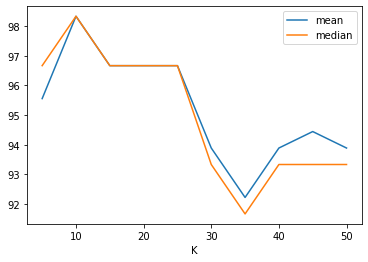

In [10]:
df.groupby(df.K)["accuracy"].agg([np.mean, np.median]).plot(title = 'accuracy across k');

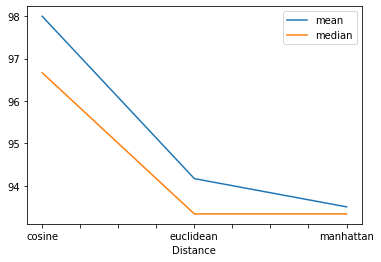

In [11]:
df.groupby(df.Distance)["accuracy"].agg([np.mean, np.median]).plot(title = 'accuracy across Distance type');

## Label Classification over MNIST dataset

In [12]:
mnist_df = pd.read_csv('mnist.csv', header = None)
mnist_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
sample = mnist_df.groupby(0).apply(lambda x: x.sample(n=100)).reset_index(drop = True)
data = sample.values
data[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
N = len(data)
K = N // 5  # test size

K_index = np.random.randint(0, N, K)
X_test = data[K_index, 1:]
Y_test = data[K_index, 0]
X_test, Y_test #test set

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([1, 2, 0, 6, 9, 6, 0, 7, 4, 3, 7, 7, 8, 4, 2, 3, 5, 6, 1, 6, 4, 1,
        8, 0, 3, 2, 6, 7, 5, 2, 9, 3, 9, 4, 7, 3, 3, 0, 4, 2, 4, 8, 9, 4,
        4, 2, 0, 2, 9, 6, 7, 7, 4, 3, 3, 4, 3, 9, 8, 0, 5, 8, 8, 6, 7, 5,
        2, 7, 3, 6, 8, 7, 8, 0, 6, 3, 7, 6, 8, 4, 0, 5, 3, 1, 7, 9, 7, 4,
        3, 8, 5, 1, 4, 4, 3, 2, 8, 9, 1, 1, 7, 0, 8, 6, 2, 6, 4, 0, 1, 7,
        0, 4, 1, 9, 4, 9, 6, 2, 1, 4, 8, 4, 8, 0, 4, 6, 4, 8, 4, 9, 3, 8,
        3, 6, 9, 3, 9, 4, 7, 3, 0, 8, 2, 9, 8, 6, 3, 0, 3, 9, 1, 0, 4, 5,
        5, 8, 7, 2, 6, 3, 6, 3, 2, 8, 8, 4, 9, 8, 4, 7, 0, 2, 0, 8, 1, 3,
        5, 7, 1, 2, 7, 2, 3, 3, 7, 5, 6, 0, 2, 8, 0, 8, 0, 1, 9, 5, 1, 4,
        1, 4], dtype=int64))

In [15]:
mask = np.ones(N, bool)
mask[K_index] = False
X_train = data[mask][:, 1:]
Y_train = data[mask][:, 0]
X_train, Y_train # training set

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2,

In [16]:
k,d  = 5, 'euclidean'
knn = KNearestNeighbors(k, d)
knn.fit(X_train, Y_train)
predicted_labels = knn.predict(X_test)
correctly_predicted = (predicted_labels == Y_test ).sum()
accuracy = correctly_predicted / K
print(f'using k = {k} with euclidean distance and uniform weights; accuracy = {accuracy*100}%')

using k = 5 with euclidean distance and uniform weights; accuracy = 90.0%


In [17]:
results = []
for k in (np.arange(5,51,5)):
    for d in ('euclidean','cosine','manhattan'):
        for vote_type in ('uniform', 'weighted'):
            knn = KNearestNeighbors(k, d, vote_type)
            knn.fit(X_train, Y_train)
            predicted_labels = knn.predict(X_test)
            correctly_predicted = (predicted_labels == Y_test ).sum()
            accuracy = correctly_predicted / K
            results.append((k,d,vote_type,accuracy*100))

cols = ['K', 'Distance', 'weights','accuracy']
df = pd.DataFrame(data = results, columns= cols)
df
#df.sort_values(by = 'accuracy', ascending= False)

,K,Distance,weights,accuracy
0,5,euclidean,uniform,90.0
1,5,euclidean,weighted,91.0
2,5,cosine,uniform,92.0
3,5,cosine,weighted,93.0
4,5,manhattan,uniform,89.0
5,5,manhattan,weighted,89.5
6,10,euclidean,uniform,90.0
7,10,euclidean,weighted,90.0
8,10,cosine,uniform,91.5
9,10,cosine,weighted,93.0


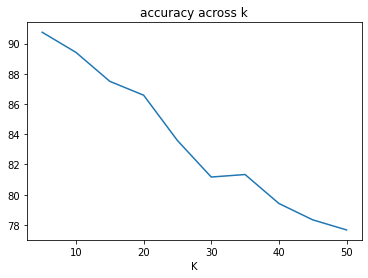

In [18]:
df.groupby(df.K)["accuracy"].mean().plot(title = 'accuracy across k');